In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
allattack=pd.read_csv("csv_attack_linux_tcpdump.csv", parse_dates=['Time'])
allattack.head()

,No.,Time,Source,Destination,Protocol,Length,Info
0,1,2011-11-16 16:36:31.418878,Micro-St_60:f7:fb,Broadcast,ARP,60,Who has 10.10.10.5? Tell 10.10.10.20
1,2,2011-11-16 16:36:31.418894,Micro-St_60:f8:09,Micro-St_60:f7:fb,ARP,60,10.10.10.5 is at 00:11:09:60:f8:09
2,3,2011-11-16 16:36:31.423544,Micro-St_60:f7:fb,Broadcast,ARP,60,Who has 10.10.10.1? Tell 10.10.10.20
3,4,2011-11-16 16:36:31.423555,3com_68:a6:95,Micro-St_60:f7:fb,ARP,60,10.10.10.1 is at 00:50:04:68:a6:95
4,5,2011-11-16 16:36:31.423558,10.10.10.20,161.139.250.2,DNS,83,Standard query 0xab42 PTR 5.10.10.10.in-addr....


In [4]:
allattack.describe()

,No.,Length
count,2331773.000000,2331773.000000
mean,1165887.000000,419.504568
std,673125.028957,586.083730
min,1.000000,42.000000
25%,582944.000000,62.000000
50%,1165887.000000,74.000000
75%,1748830.000000,610.000000
max,2331773.000000,1514.000000


In [5]:
infodata = allattack[['Time','Source','Destination','Protocol',
                  'Length','Info']]

In [6]:
category_group=infodata.groupby(['Source','Destination','Protocol']).sum()
category_group

Length
Source                    Destination       Protocol            
10.10.10.1                10.10.10.15       TCP              360
10.10.10.15               10.10.10.1        TCP              372
                          10.10.10.20       ICMP             120
                                            TCP              372
                                            UDP               60
                          10.10.10.255      BROWSER         4633
                                            NBNS            4140
                          10.10.10.30       TCP              310
                          10.10.10.5        802.11           258
                                            ALLJOYN-NS        69
                                            ANSI C12.22       60
                                            AODV            4536
                                            ASF              240
                                            ASTERIX           69
                                            AX4000            69
                                            AYIYA             69
                                            Auto-RP         4536
                                            BAT_BATMAN        69
                                            BAT_GW            60
                                            BAT_VIS           69
                                            BFD Control      285
                                            BJNP             240
                                            BOOTP          10274
                                            CAPWAP           120
                                            CLASSIC-STUN     210
                                            CLDAP           4750
                                            CN/IP            129
                                            CUPS            4536
                                            CoAP              60
                                            DAYTIME        57363
...                                                          ...
67.201.31.64              10.10.10.15       HTTP             176
                                            TCP            47892
72.3.245.172              10.10.10.15       HTTP             383
                                            TCP              182
74.125.39.113             10.10.10.15       HTTP            1440
                                            TCP             2178
74.125.39.120             10.10.10.15       TCP              702
                                            TLSv1          67088
74.125.39.138             10.10.10.15       HTTP            1188
                                            TCP             2568
                                            TLSv1           3416
76:20:69:63:6d:70         70:69:6e:67:20:2d 0x2031            69
77.67.96.198              10.10.10.30       HTTP            4279
                                            TCP            29733
87.230.63.11              10.10.10.15       TCP             2990
Micro-St_60:f7:fb         3com_68:a6:95     ARP              360
                          Broadcast         ARP             9660
                          Micro-St_60:f8:09 ARP              840
                          Tp-LinkT_b5:79:3f ARP              180
Micro-St_60:f8:09         Broadcast         ARP               60
                          Micro-St_60:f7:fb ARP             1260
                          Tp-LinkT_b5:79:3f ARP             2700
Supermic_df:55:10         3com_68:a6:95     ARP              756
                          Tp-LinkT_b5:79:3f ARP              126
Tp-LinkT_b5:79:3f         3com_68:a6:95     ARP             1440
                          Broadcast         ARP            55380
                          Micro-St_60:f7:fb ARP               60
                          Micro-St_60:f8:09 ARP             2040
                          Supermic_df:55:10 ARP               60
fe80::8000:5445:5245:444f ff

In [7]:
category_group.unstack().head()

Length                                              \
Protocol                  0x2031  802.11  ALLJOYN-NS  ANSI C12.22  AODV  ARP   
Source      Destination                                                        
10.10.10.1  10.10.10.15      NaN     NaN         NaN          NaN   NaN  NaN   
10.10.10.15 10.10.10.1       NaN     NaN         NaN          NaN   NaN  NaN   
            10.10.10.20      NaN     NaN         NaN          NaN   NaN  NaN   
            10.10.10.255     NaN     NaN         NaN          NaN   NaN  NaN   
            10.10.10.30      NaN     NaN         NaN          NaN   NaN  NaN   

                                                       ...              \
Protocol                  ASF  ASTERIX  AX4000  AYIYA  ...    WTLS+WSP   
Source      Destination                                ...               
10.10.10.1  10.10.10.15   NaN      NaN     NaN    NaN  ...         NaN   
10.10.10.15 10.10.10.1    NaN      NaN     NaN    NaN  ...         NaN   
            10.10.10.20   NaN      NaN     NaN    NaN  ...         NaN   
            10.10.10.255  NaN      NaN     NaN    NaN  ...         NaN   
            10.10.10.30   NaN      NaN     NaN    NaN  ...         NaN   

                                                                              \
Protocol                  WTLS+WTP+WSP  WTP+WSP  X11  XDMCP  XTACACS  XYPLEX   
Source      Destination                                                        
10.10.10.1  10.10.10.15            NaN      NaN  NaN    NaN      NaN     NaN   
10.10.10.15 10.10.10.1             NaN      NaN  NaN    NaN      NaN     NaN   
            10.10.10.20            NaN      NaN  NaN    NaN      NaN     NaN   
            10.10.10.255           NaN      NaN  NaN    NaN      NaN     NaN   
            10.10.10.30            NaN      NaN  NaN    NaN      NaN     NaN   

                                                      
Protocol                  collectd  lw_res  packetbb  
Source      Destination                               
10.10.10.1  10.10.10.15        NaN     NaN       NaN  
10.10.10.15 10.10.10.1         NaN     NaN       NaN  
            10.10.10.20        NaN     NaN       NaN  
            10.10.10.255       NaN     NaN       NaN  
            10.10.10.30        NaN     NaN       NaN  

[5 rows x 152 columns]

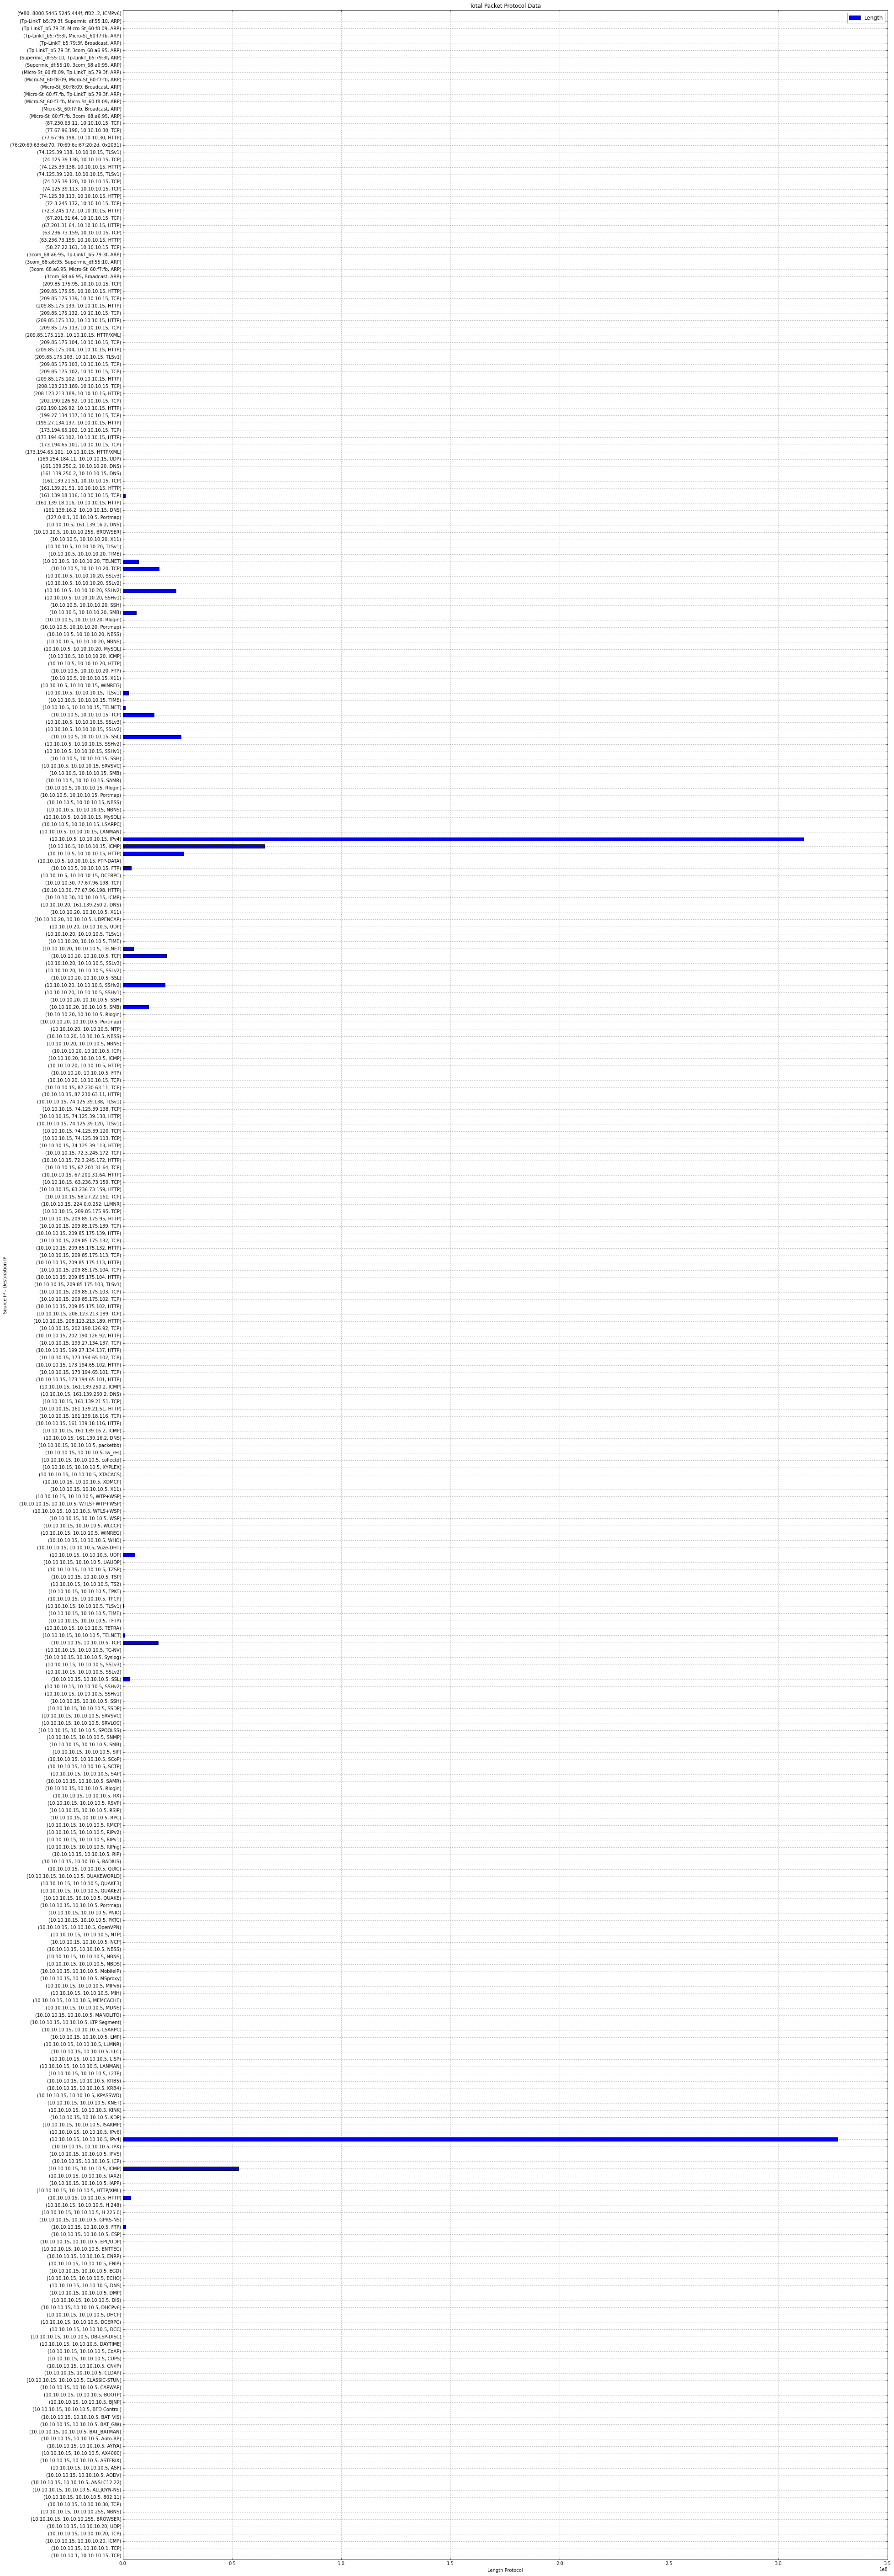

In [8]:
my_plot = category_group.plot(kind='barh',stacked=True,title="Total Packet Protocol Data",figsize=(30,100))
my_plot.set_xlabel("Length Protocol")
my_plot.set_ylabel("Source IP - Destination IP")

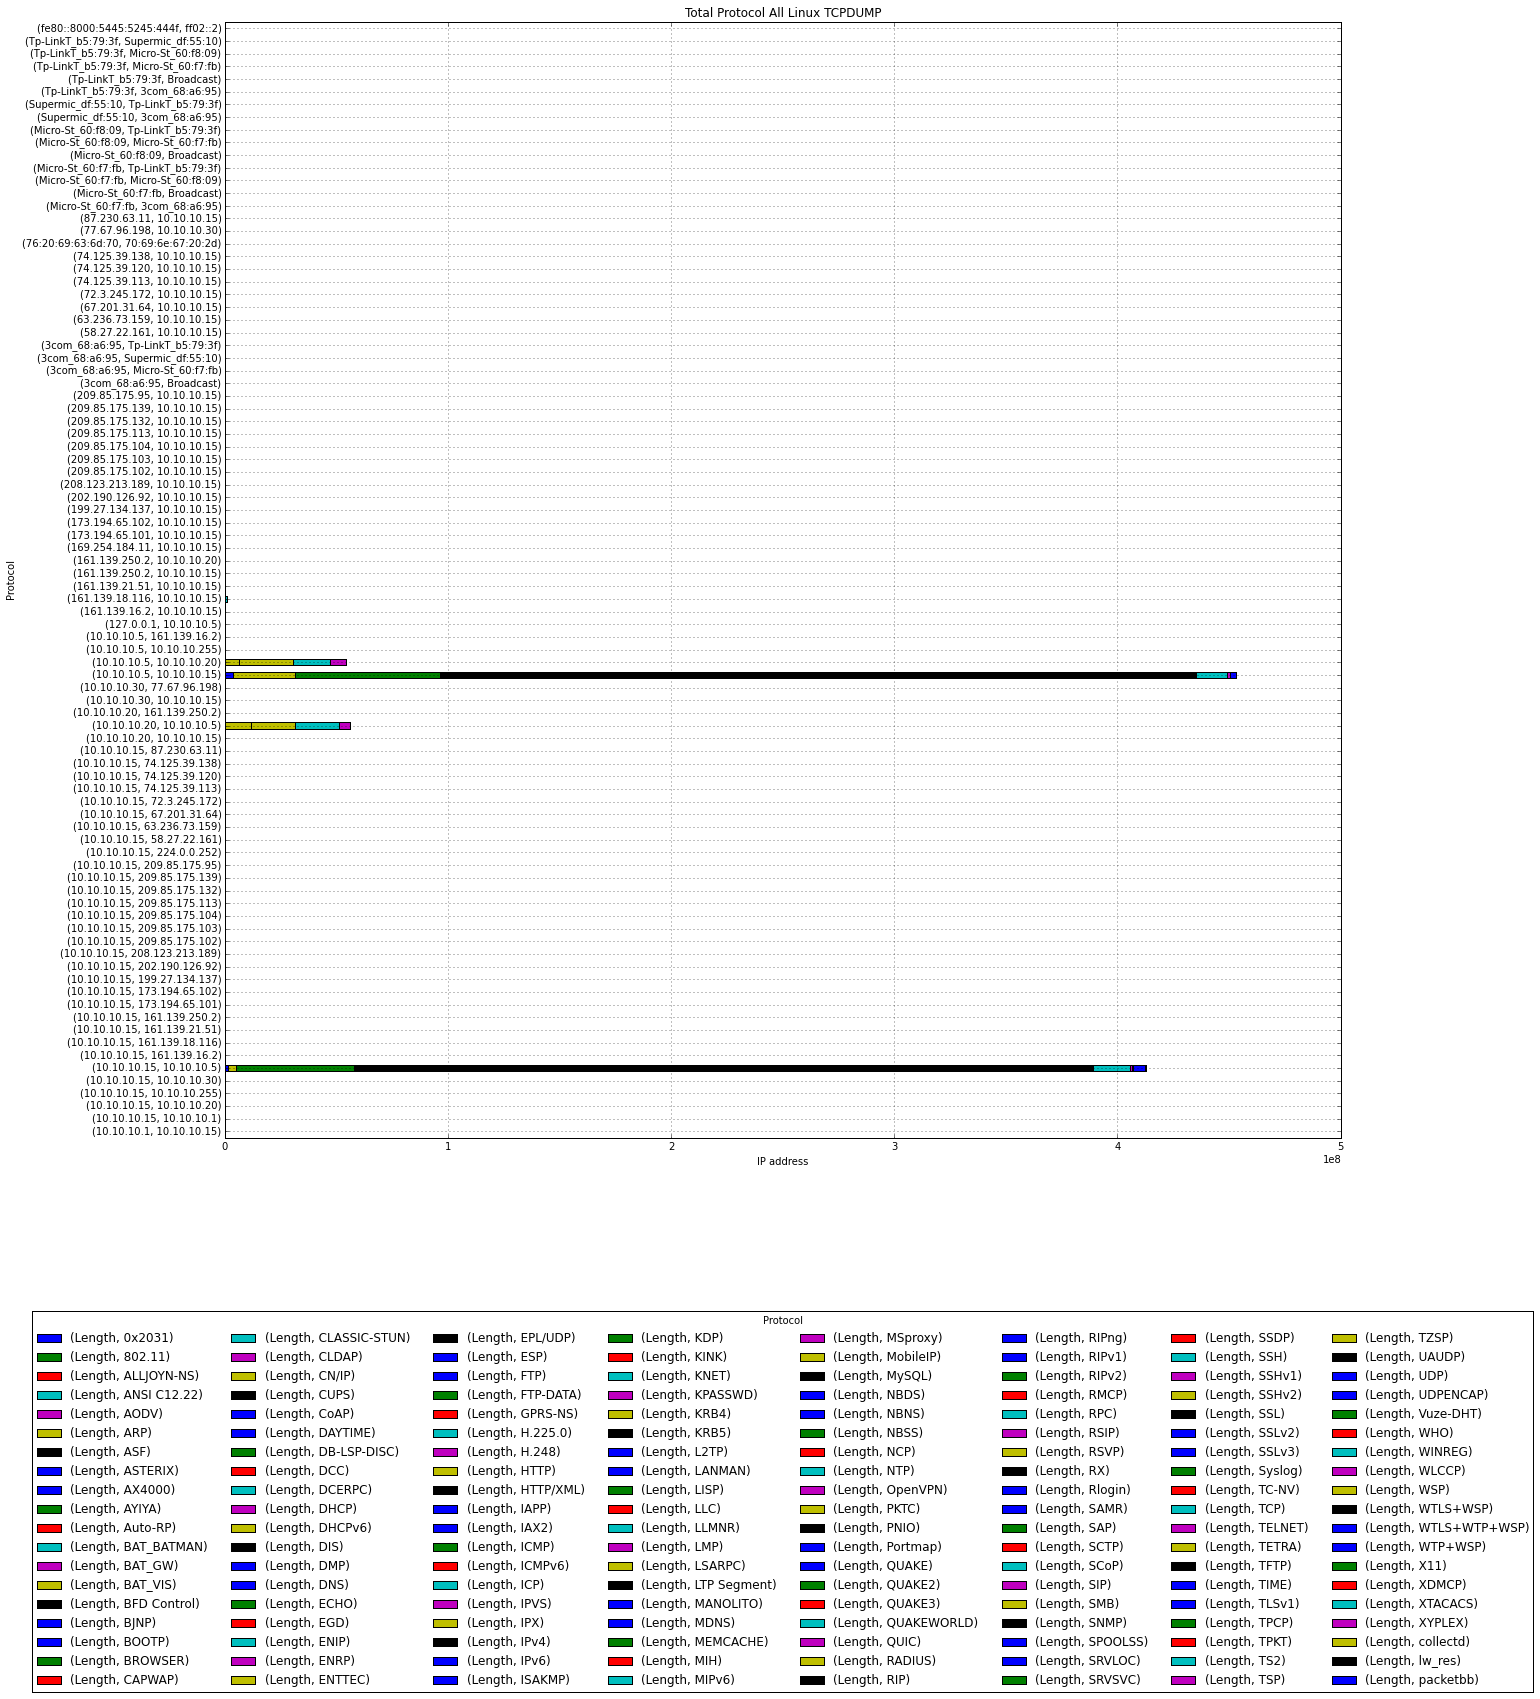

In [9]:
my_plot = category_group.unstack().plot(kind='barh',stacked=True,title="Total Protocol All Linux TCPDUMP",figsize=(20, 20))
my_plot.set_xlabel("IP address")
my_plot.set_ylabel("Protocol")
patches, labels = my_plot.get_legend_handles_labels()
my_plot.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=8, title="Protocol")